# Lab 4

April 27, 2023

### 1 Autorzy
- Mateusz Łopaciński
- Mateusz Mazur

### 2 Przygotowanie danych
##### 2.1 Wczytanie danych
W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować.

In [118]:
import pandas as pd
import numpy as np
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
adult_df = pd.read_csv('dataset/adult-all.csv', header=None,names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

In [119]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Sprawdźmy również kilka początkowych wartości z obu zbiorów

##### 2.2 Usunięcie brakujących danych.

In [120]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Aby sprawdzić liczbę brakujących wartości zastępujemy "?" nullami.

In [121]:
adult_df.replace('?', np.nan, inplace=True)
adult_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

<AxesSubplot: >

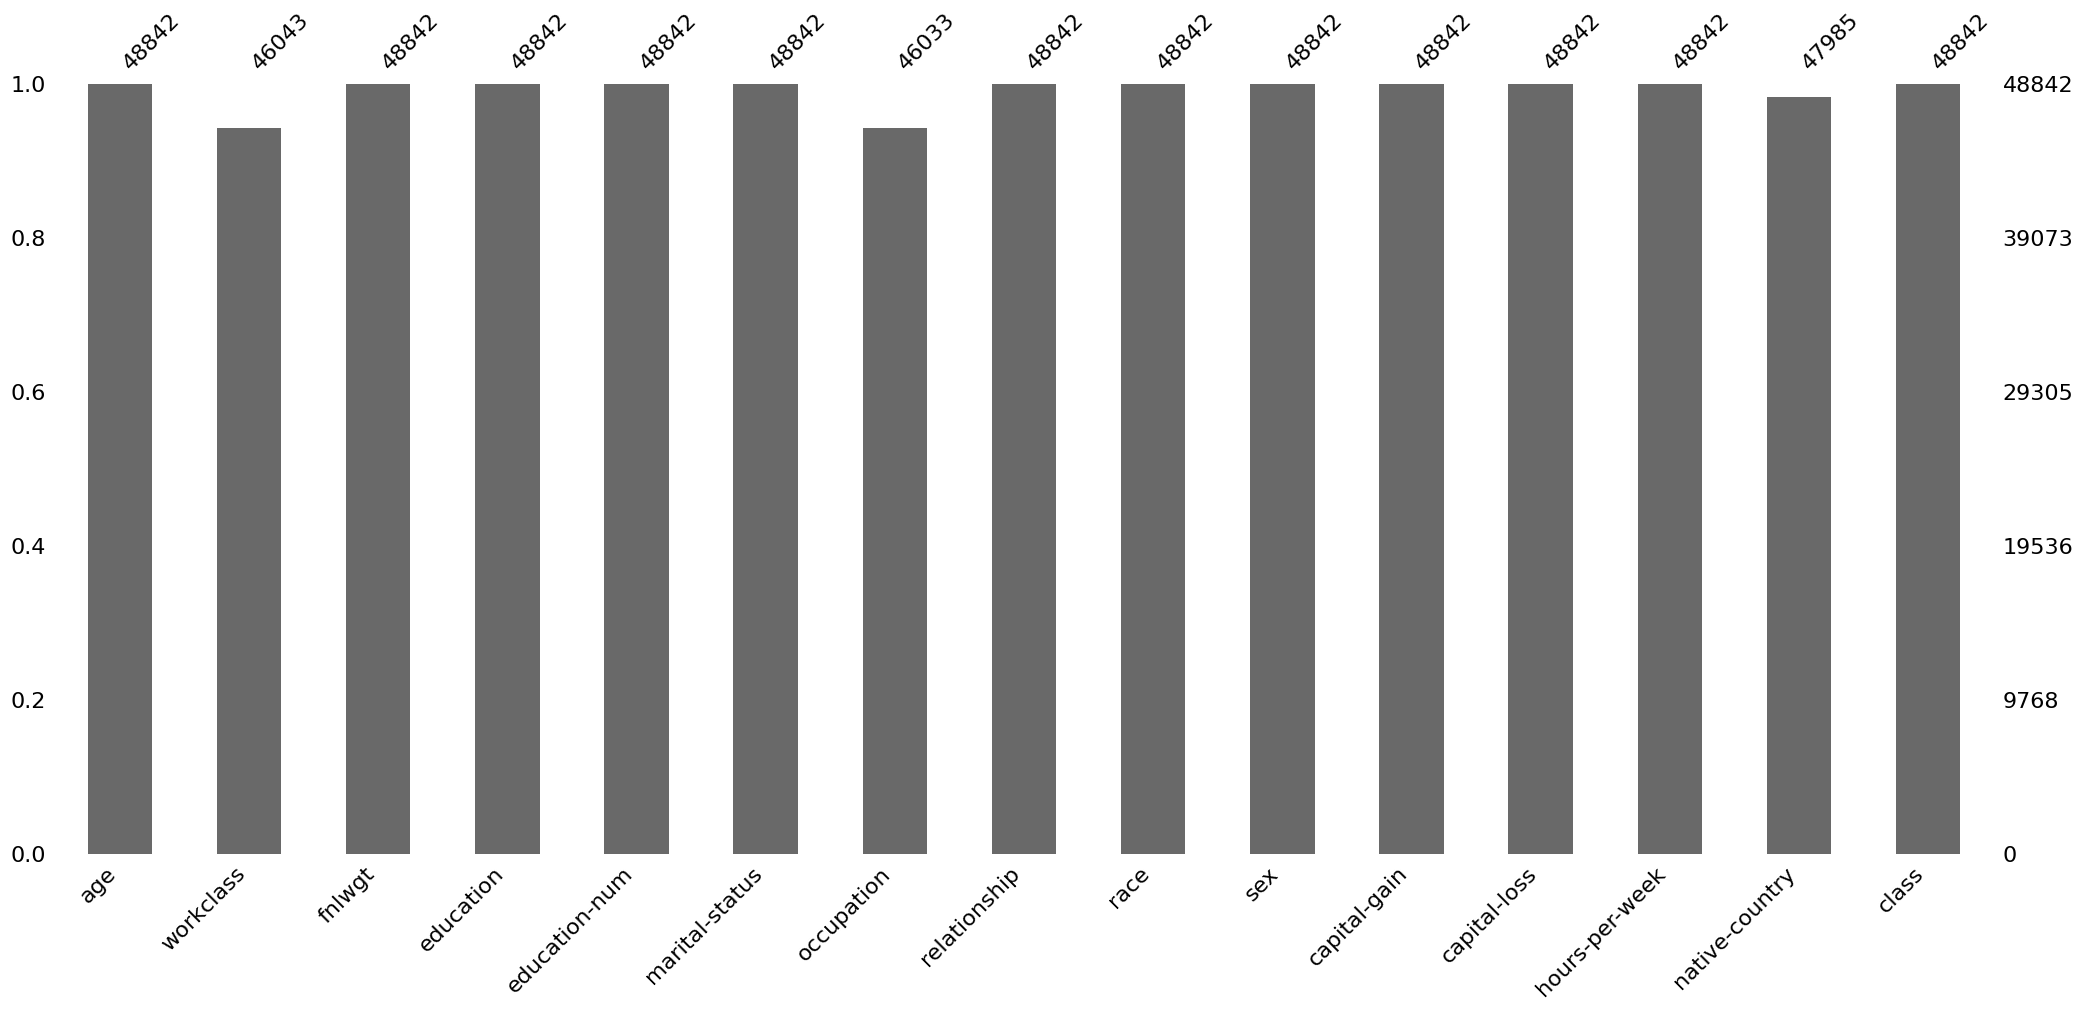

In [122]:
import missingno as msno
msno.bar(adult_df)

Jak widzimy, większość brakujących danych, to dane kategoryczne. Usuniemy wiersze je zawierające.

In [123]:
adult_df=adult_df.dropna()
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Usuwamy również kolumnę "education" zostawiając "education-num", która niesie dla nas tę samą informację.

In [124]:
adult_df = adult_df.drop("education", axis=1)
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


##### 2.3 Normalizacja danych liczbowych



Normalizujemy zmienne numeryczne

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]
adult_df[numeric_cols] = scaler.fit_transform(adult_df[numeric_cols])

In [126]:
adult_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.034201,State-gov,-1.062295,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States,<=50K
1,0.866417,Self-emp-not-inc,-1.007438,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States,<=50K
2,-0.041455,Private,0.245284,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
3,1.093385,Private,0.425853,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
4,-0.798015,Private,1.407393,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba,<=50K


Kodujemy teraz wartości nominalne poprzez one-hot-encoding

In [127]:
adult_df = pd.get_dummies(data=adult_df,columns=["workclass","education-num","marital-status","occupation","relationship","race","sex","native-country"])
adult_df.shape

(45222, 104)

In [128]:
adult_df["class"] = (adult_df["class"] == ">50K").astype(np.int8)

adult_df["class"].value_counts()

0    34014
1    11208
Name: class, dtype: int64

### 3 Pomiary

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


def random_forest_classify(df,n_estimators,max_features,min_samples_split,min_samples_leaf):
    X, y = df.drop('class', axis=1), df['class']

    clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
            random_state=42, )
    
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

    outer_scores_acc = []
    outer_scores_prec = []
    outer_scores_rec = []

    for train_index, test_index in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        inner_scores = cross_validate(clf, X_train, y_train, cv=inner_cv, scoring=['accuracy', 'precision', 'recall'])
        best_params_index = inner_scores['test_accuracy'].argmax()

        best_params = inner_scores['params'][best_params_index]
        clf.set_params(**best_params)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        outer_scores_acc.append(accuracy_score(y_test, y_pred))
        outer_scores_prec.append(precision_score(y_test, y_pred))
        outer_scores_rec.append(recall_score(y_test, y_pred))
            
    print(f"Accuracy mean: {np.mean(outer_scores_acc)}")
    print(f"Precision mean: {np.mean(outer_scores_prec)}")
    print(f"Recall mean: {np.mean(outer_scores_rec)}")




def rf_classify(df):
    X, y = df.drop('class', axis=1).iloc[:1000], df['class'].iloc[:1000]

    # Define the hyperparameter grid to search over
    param_grid = {
        'n_estimators': [50, 100],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

    # Define the inner and outer cross-validation folds
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define the grid search object
    grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                            param_grid=param_grid,
                            scoring=['accuracy','precision','recall'],
                            cv=inner_cv,
                            refit='accuracy')

    # Perform nested cross-validation
    nested_scores = cross_validate(grid_search, X=X, y=y, cv=outer_cv, scoring=scoring)
    print(nested_scores)
    
    grid_search.fit(X,y)
    print(grid_search.best_params_)
    

    for name, importance in zip(df.columns, grid_search.feature_importances_):
        print(f"{name}: {importance}")
    # Print the mean and standard deviation of the nested cross-validation scores
    # print("Nested CV accuracy: %.3f +/- %.3f" % (nested_scores.mean(), nested_scores.std()))

In [175]:
# random_forest_classify(adult_df,100,"sqrt",2,1)
rf_classify(adult_df)

{'fit_time': array([10.92800426, 11.07281756, 11.29089427, 11.4739542 , 11.20885086]), 'score_time': array([0.01701236, 0.0170002 , 0.01600003, 0.01100993, 0.01598668]), 'test_accuracy': array([0.83 , 0.84 , 0.845, 0.845, 0.83 ]), 'test_precision': array([0.725     , 0.81481481, 0.72093023, 0.79411765, 0.625     ]), 'test_recall': array([0.55769231, 0.44897959, 0.62      , 0.52941176, 0.47619048])}
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'